<a href="https://colab.research.google.com/github/rsdevboy/DSBloomFilterProject/blob/master/documentation/CS261P_Bloom_Filter_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

In [0]:
bloomFilterData = pd.read_csv("BloomFilterTestData.csv", header=None)
bloomFilterData2 = pd.read_csv("BloomFilterTestData_small.csv", header=None)
bloomFilterData.columns = ['k', 'n', 't', 'general_bf_TP', 'general_bf_FP', 'k_array_bf_TP', 'k_array_bf_FP', 'general_FPR', 'k_array_FPR'] 
bloomFilterData2.columns = ['k', 'n', 't', 'general_bf_TP', 'general_bf_FP', 'k_array_bf_TP', 'k_array_bf_FP', 'general_FPR', 'k_array_FPR'] 

bloomFilterData.head()

,k,n,t,general_bf_TP,general_bf_FP,k_array_bf_TP,k_array_bf_FP,general_FPR,k_array_FPR
0,2,50,10000,0,3,0,6,0.03,0.06
1,3,50,10000,0,0,0,0,0.00,0.00
2,4,50,10000,0,0,0,0,0.00,0.00
3,5,50,10000,0,0,0,0,0.00,0.00
4,6,50,10000,1,0,1,0,0.00,0.00


Text(0.5, 1.0, 'n vs FPR for Regular Bloom Filter with different number of Hash Functions(k) ')

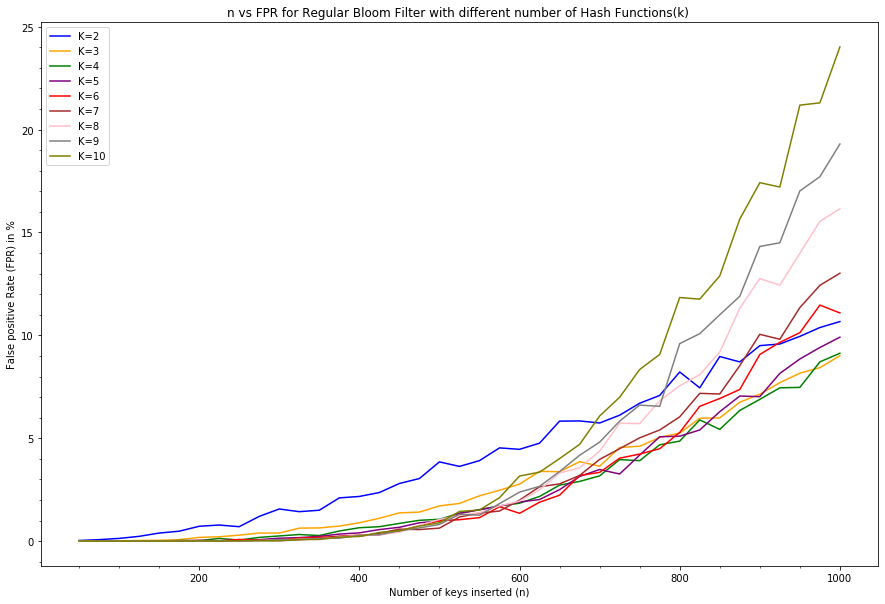

In [0]:
from cycler import cycler
k_sorted=bloomFilterData2.sort_values(by=['k','n'])
plt.rc('axes', prop_cycle=(cycler('color', ['blue', 'orange', 'green', 'purple', 'red', 'brown', 'pink', 'gray', 'olive', 'cyan'])))

for i in range(0, len(k_sorted), 39):
  subset = k_sorted[i:i+39]
  plt.plot(subset['n'], subset['general_FPR'])
plt.legend(['K=2','K=3','K=4','K=5','K=6','K=7','K=8','K=9','K=10'])
plt.minorticks_on();
plt.xlabel('Number of keys inserted (n)')
plt.ylabel('False positive Rate (FPR) in %')
plt.title('n vs FPR for Regular Bloom Filter with different number of Hash Functions(k) ')


Text(0.5, 1.0, 'n vs FPR for K Array Bloom Filter with different number of Hash Functions(k) ')

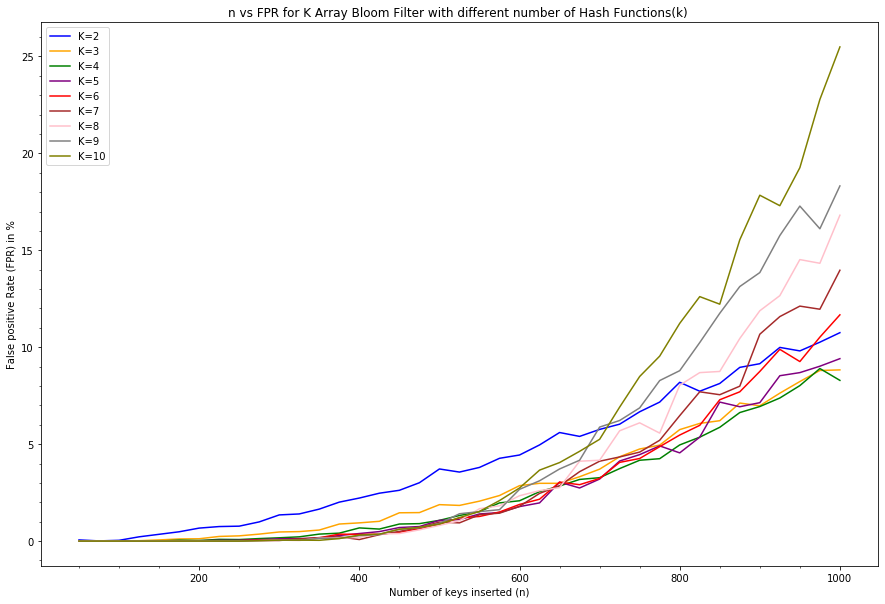

In [0]:
for i in range(0, len(k_sorted), 39):
  subset = k_sorted[i:i+39]
  plt.plot(subset['n'], subset['k_array_FPR'])
plt.legend(['K=2','K=3','K=4','K=5','K=6','K=7','K=8','K=9','K=10'])
plt.minorticks_on();
plt.xlabel('Number of keys inserted (n)')
plt.ylabel('False positive Rate (FPR) in %')
plt.title('n vs FPR for K Array Bloom Filter with different number of Hash Functions(k) ')


In [0]:
general_mean = pd.Series()
k_array_mean = pd.Series()
improvement = pd.Series()
improvement2 = pd.Series()
mean_k_array_bf = pd.Series()
for i in range(0, len(k_sorted), 39):
  subset = k_sorted[i:i+39]
  general_mean = general_mean.set_value(i//39, subset['k_array_FPR'].mean())
  k_array_mean = k_array_mean.set_value(i//39, subset['general_FPR'].mean())
  improvement = improvement.set_value(i//39,subset['k_array_FPR'].mean() - subset['general_FPR'].mean())
improvement.describe()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


count    9.000000
mean     0.016439
std      0.060334
min     -0.055128
25%     -0.015385
50%      0.008205
75%      0.020256
max      0.122051
dtype: float64

Text(0.5, 0, 'Number of Hash Functions')

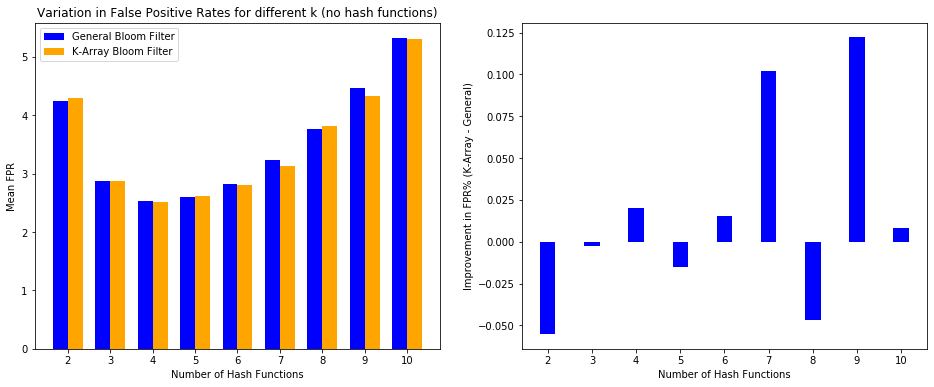

In [0]:
plt.rcParams["figure.figsize"] = (16,6)
fig, ax = plt.subplots(1,2)

width = 0.35
labels = range(2,11)
x = np.arange(len(labels))
rects1 = ax[0].bar(x - width/2, general_mean, width, label='General Bloom Filter')
rects2 = ax[0].bar(x + width/2, k_array_mean, width, label='K-Array Bloom Filter')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Mean FPR')
ax[0].set_xlabel('Number of Hash Functions')
ax[0].set_title('Variation in False Positive Rates for different k (no hash functions)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

#ax[1].set_title('t for Improvement (%)')
ax[1].bar(x, improvement, width)
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('Improvement in FPR% (K-Array - General)')
ax[1].set_xlabel('Number of Hash Functions')

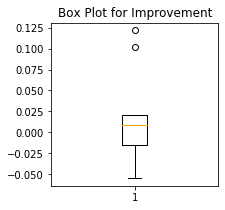

In [0]:
plt.rcParams["figure.figsize"] = (3,3)
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot for Improvement')
ax1.boxplot(improvement)
fig1.figsize=(3, 3)

In [0]:
general_mean = pd.Series()
k_array_mean = pd.Series()

from cycler import cycler
n_sorted=bloomFilterData2.sort_values(by=['n','k'])

for i in range(0, len(n_sorted), 9):
  subset = n_sorted[i:i+9]
  general_mean = general_mean.set_value(i//9, subset['k_array_FPR'].mean())
  k_array_mean = k_array_mean.set_value(i//9, subset['general_FPR'].mean())
  improvement = improvement.set_value(i//9,subset['k_array_FPR'].mean() - subset['general_FPR'].mean())

improvement.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


count    39.000000
mean      0.016439
std       0.110072
min      -0.300000
25%      -0.025556
50%      -0.001111
75%       0.058333
max       0.468889
dtype: float64

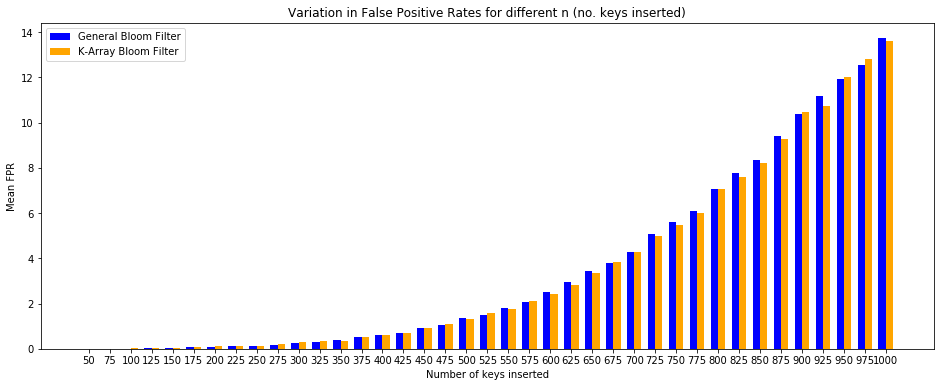

In [0]:
plt.rcParams["figure.figsize"] = (16,6)
fig, ax = plt.subplots()

width = 0.35
labels = range(50,1001, 25)
x = np.arange(len(labels))
rects1 = ax.bar(x - width/2, general_mean, width, label='General Bloom Filter')
rects2 = ax.bar(x + width/2, k_array_mean, width, label='K-Array Bloom Filter')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean FPR')
ax.set_xlabel('Number of keys inserted')
ax.set_title('Variation in False Positive Rates for different n (no. keys inserted)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


Text(0.5, 0, 'Number of keys inserted')

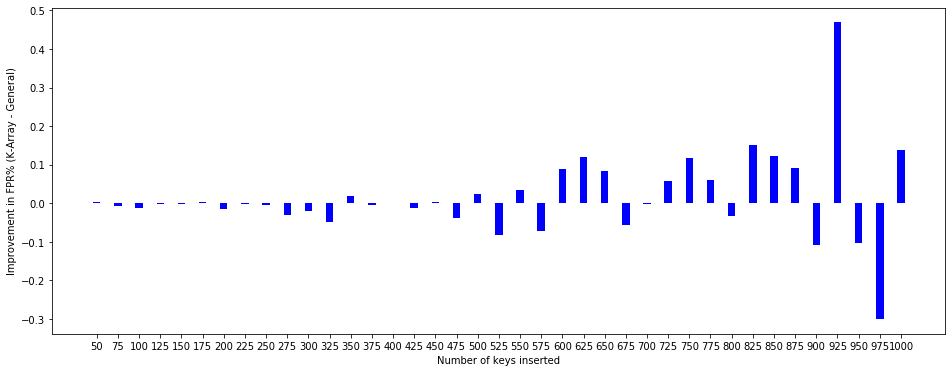

In [0]:
fig, ax = plt.subplots()
ax.bar(x, improvement, width)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Improvement in FPR% (K-Array - General)')
ax.set_xlabel('Number of keys inserted')